놀이기구 만족도 데이터 분석

In [19]:
import pandas as pd
df=pd.read_csv("c:/data/rides/rides.csv")
print(df.head())

  weekend  num.child    distance  rides  games  wait  clean  overall
0     yes          0  114.648259     87     73    60     89       47
1     yes          2   27.014097     87     78    76     87       65
2      no          1   63.300975     85     80    70     88       61
3     yes          0   25.909931     88     72    66     89       37
4      no          4   54.718307     84     87    74     87       68


In [20]:
#단순회귀분석 : 놀이기구 만족도와 전체 만족도와의 관계
x=df["rides"].values
print(x[:10])
y=df["overall"].values
print(y[:10])

[87 87 85 88 84 81 77 82 90 88]
[47 65 61 37 68 27 40 30 58 36]


In [21]:
from scipy import stats
result=stats.linregress(x, y)
result
# slope : 기울기, intercept : 절편, rvalue : 상관계수
# p-value : 예측 불확실성의 정도를 나타내는 값
# stderr : 에러의 표준편차
# p-value는 0.05 미만일 때 유의함
# 모형의 적합도 : rvalue 0이 아니므로 추정하는 회귀함수가 유의미하다.
# rvalue : 0.45 이 모델은 45%의 설명력이 있음
# p_value : 0.05보다 작으므로 통계적으로 유의함
# 따라서 귀무가설을 기각하고 대립가설을 채택한다.
# 결론 : 놀이기구에 대한 만족도는 전체만족도에 영향을 미친다.

LinregressResult(slope=1.7032854834102056, intercept=-94.96224560883252, rvalue=0.5859862820034282, pvalue=1.9715137881102242e-47, stderr=0.10554615174616558, intercept_stderr=9.07900488077085)

Text(0, 0.5, '전체 만족도')

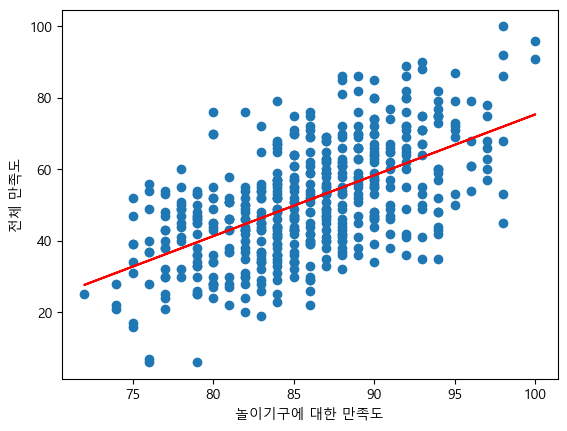

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name=font_manager.FontProperties(\
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
slope, intercept, r_value, p_value, stderr=stats.linregress(x, y)
#산점도 그리기
plt.scatter(x,y)
#회귀선 그리기
plt.plot(x, slope*x +intercept, c="red")
plt.xlabel("놀이기구에 대한 만족도")
plt.ylabel("전체 만족도")

In [23]:
#놀이기구에 대한 만족도가 90일 때 전체 만족도 예측
90*slope+intercept 

58.33344789808598

In [24]:
#범주형 변수 처리(주말여부)
df2=pd.get_dummies(df['weekend'],prefix='weekend')
df=pd.concat([df,df2],axis=1)
del df['weekend']
df.head()

,num.child,distance,rides,games,wait,clean,overall,weekend_no,weekend_yes
0,0,114.648259,87,73,60,89,47,0,1
1,2,27.014097,87,78,76,87,65,0,1
2,1,63.300975,85,80,70,88,61,1,0
3,0,25.909931,88,72,66,89,37,0,1
4,4,54.718307,84,87,74,87,68,1,0


In [25]:
#다중회귀분석
#독립변수
X=df[['num.child', 'distance', 'rides', 'games', 'wait',
      'clean', 'weekend_no', 'weekend_yes']]
#종속변수
y=df['overall']

In [26]:
import statsmodels.api as sm
model=sm.OLS(y, X)
result=model.fit()
result.summary()
# 모델의 설명력 68.3%
# p-value : distance, games(게임종류) 유의하지 않음
# 해석
# 만족도에 가장 큰 영향을 미치는 변수는 자녀수이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     151.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.73e-118
Time:                        11:56:02   Log-Likelihood:                -1804.1
No. Observations:                 500   AIC:                             3624.
Df Residuals:                     492   BIC:                             3658.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
num.child       3.6160      0.270     13.403      0.000       3.086       4.146
distance        0.0449      0.012      3.686      0.000       0.021       0.069
rides           0.6136      0.121      5.072      0.000       0.376       0.851
games           0.1383      0.059      2.356      0.019       0.023       0.254
wait            0.5648      0.041     13.896      0.000       0.485       0.645
clean           0.9272      0.136      6.821      0.000       0.660       1.194
weekend_no   -140.6125      7.154    -19.655      0.000    -154.669    -126.556
weekend_yes  -141.3283      7.121    -19.847      0.000    -155.319    -127.337
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.943
Skew:                          -0.050   Prob(JB):                        0.379
Kurtosis:                       2.712   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#자녀수, 거리, 놀이기구점수, 게임점수, 대기시간점수, 청결도, 평일여부, 주말여부
result.predict([2, 20, 80, 70, 80, 90, 0, 1])

array([54.20768166])

In [28]:
result.predict([3, 10, 80, 70, 80, 90, 1, 0])

array([58.09006564])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#데이터셋을 나눔(학습용:검증용 = 8:2)
#random_state : 난수 발생을 위한 seed의 인자값
X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.2, random_state=10)
model=LinearRegression().fit(X_train, y_train)

In [30]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.6670609590984946
검증용: 0.7212343349658576


In [31]:
#자녀수, 거리, 놀이기구점수, 게임점수, 대기시간점수, 청결도, 평일여부, 주말여부
model.predict([[2, 20, 80, 70, 80, 90, 0, 1]])

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.30062057])

In [32]:
model.predict([[3, 10, 80, 70, 80, 90, 1, 0]])

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.97589809])

In [33]:
import joblib
joblib.dump(model, 'c:/data/rides/rides_regress.model')

['c:/data/rides/rides_regress.model']

놀이동산 만족도 예측 모형 불러오기

In [34]:
import joblib
model=joblib.load('c:/data/rides/rides_regress.model')

In [35]:
#자녀수, 거리, 놀이기구점수, 게임점수, 대기시간점수, 청결도, 평일여부, 주말여부
model.predict([[2, 20, 80, 70, 80, 90, 0, 1]])

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.30062057])

In [36]:
model.predict([[3, 10, 80, 70, 80, 90, 1, 0]])

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.97589809])